Step 1: Load the Iris dataset and import the necessary libraries.



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Step 2: Create a DataFrame to better visualize the data.



In [19]:
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['species'] = y

Step 3: Normalization.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame for visualization
iris_normalized_df = pd.DataFrame(data=X_normalized, columns=feature_names)
iris_normalized_df['species'] = y

Step 4: Indicator Variables (One-Hot Encoding).



In [21]:
species_onehot = pd.get_dummies(y, columns=target_names)
species_onehot.columns = [f'species_{name}' for name in target_names]

# Concatenate the one-hot encoded target variables back to the feature DataFrame
iris_encoded_df = pd.concat([iris_df, species_onehot], axis=1)

Step 5: Binning.



In [22]:
sepal_length_bins = [0, 5.5, 6.5, float('inf')]
sepal_length_labels = ['Short', 'Medium', 'Long']
iris_df['SepalLengthGroup'] = pd.cut(iris_df['sepal length (cm)'], bins=sepal_length_bins, labels=sepal_length_labels)

Step 6: Data Visualization.



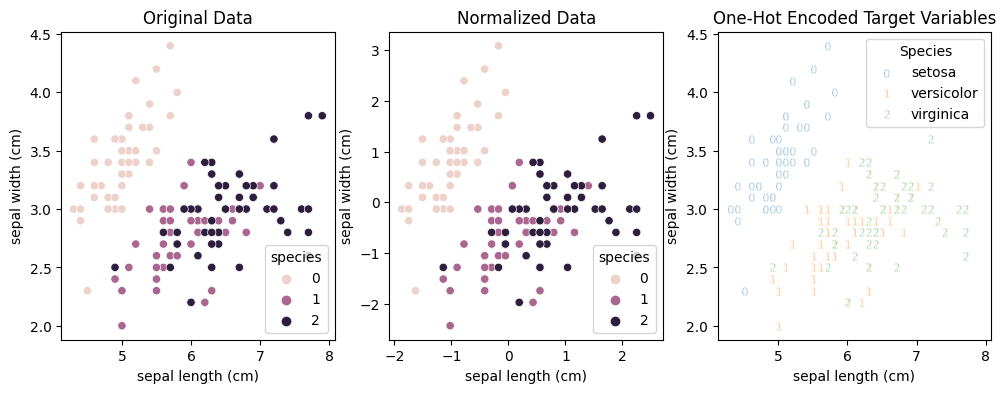

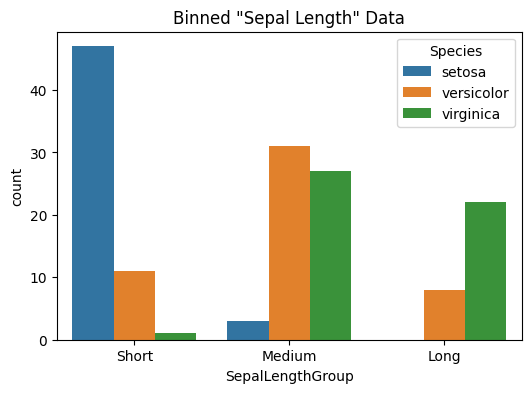

In [26]:
# Plot the original data distribution
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Original Data')

# Plot the normalized data distribution
plt.subplot(132)
sns.scatterplot(data=iris_normalized_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Normalized Data')

# Plot the one-hot encoded target variables
plt.subplot(133)
for i, species_name in enumerate(target_names):
    sns.scatterplot(
        data=iris_encoded_df[iris_encoded_df[f'species_{species_name}'] == 1],
        x='sepal length (cm)', y='sepal width (cm)',
        marker=f"${i}$", label=species_name
    )
plt.title('One-Hot Encoded Target Variables')
plt.legend(title='Species')
plt.show()

# Plot the binned "Sepal Length" data
plt.figure(figsize=(6, 4))
sns.countplot(data=iris_df, x='SepalLengthGroup', hue='species')
plt.title('Binned "Sepal Length" Data')
plt.legend(title='Species', labels=target_names)
plt.show()


Step 1: Load and explore the dataset.



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the first few rows of the DataFrame
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Step 2: Handle Missing Values.



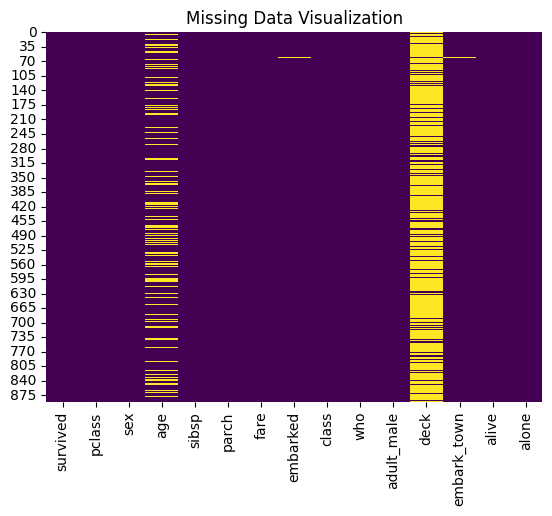

In [4]:
# Plot missing data
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

Step 3: Feature Transformation.



In [5]:
# One-hot encode the "Sex" and "Embarked" columns
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)
titanic_df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,1,0,1
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,1
888,0,3,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0,0,1
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1,0,0


In [7]:
# Create a new feature "FamilySize" by combining "SibSp" and "Parch"
titanic_df['FamilySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1
titanic_df

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,FamilySize
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,1,2
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0,0,0,2
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1,2
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,1,0,1,1
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,1,1
888,0,3,NaN,1,2,23.4500,Third,woman,False,NaN,Southampton,no,False,0,0,1,4
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1,0,0,1


In [8]:
# Display the first few rows of the DataFrame after feature transformation
print(titanic_df.head())

   survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

  deck  embark_town alive  alone  sex_male  embarked_Q  embarked_S  FamilySize  
0  NaN  Southampton    no  False         1           0           1           2  
1    C    Cherbourg   yes  False         0           0           0           2  
2  NaN  Southampton   yes   True         0           0           1           1  
3    C  Southampton   yes  False         0           0           1           2  
4  NaN  Southampton    no   True         1           0           1           1  


Step 4: Feature Scaling (if needed).



In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the "Age" and "Fare" columns
titanic_df[['age', 'fare']] = scaler.fit_transform(titanic_df[['age', 'fare']])

# Display the first few rows of the DataFrame after feature scaling
print(titanic_df.head())

   survived  pclass       age  sibsp  parch      fare  class    who  \
0         0       3 -0.530377      1      0 -0.502445  Third    man   
1         1       1  0.571831      1      0  0.786845  First  woman   
2         1       3 -0.254825      0      0 -0.488854  Third  woman   
3         1       1  0.365167      1      0  0.420730  First  woman   
4         0       3  0.365167      0      0 -0.486337  Third    man   

   adult_male deck  embark_town alive  alone  sex_male  embarked_Q  \
0        True  NaN  Southampton    no  False         1           0   
1       False    C    Cherbourg   yes  False         0           0   
2       False  NaN  Southampton   yes   True         0           0   
3       False    C  Southampton   yes  False         0           0   
4        True  NaN  Southampton    no   True         1           0   

   embarked_S  FamilySize  
0           1           2  
1           0           2  
2           1           1  
3           1           2  
4           

Step 5: Feature Selection (if needed).



Text(0.5, 1.0, 'Age Distribution (Before Scaling)')

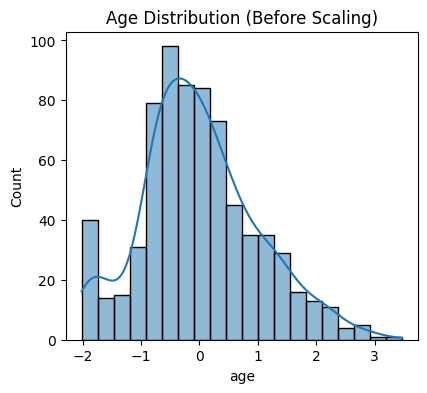

In [10]:
# Plot the distribution of "Age" before and after scaling
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['age'], kde=True)
plt.title('Age Distribution (Before Scaling)')

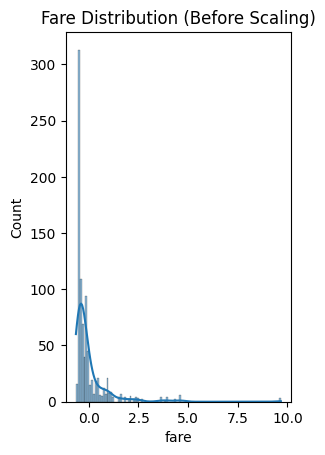

In [11]:
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['fare'], kde=True)
plt.title('Fare Distribution (Before Scaling)')
plt.show()

Binning Age and Fare:


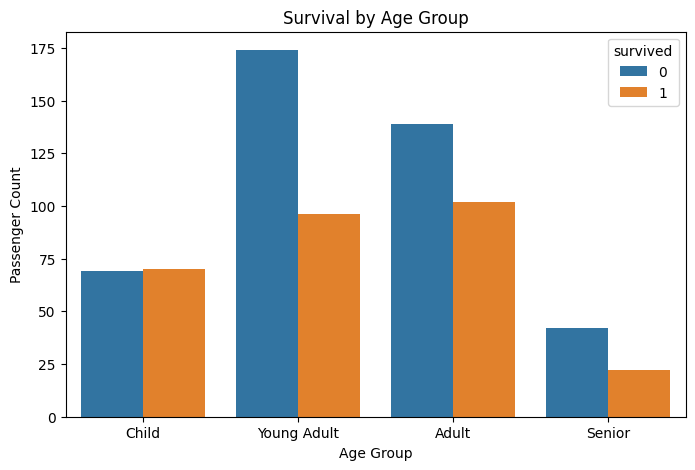

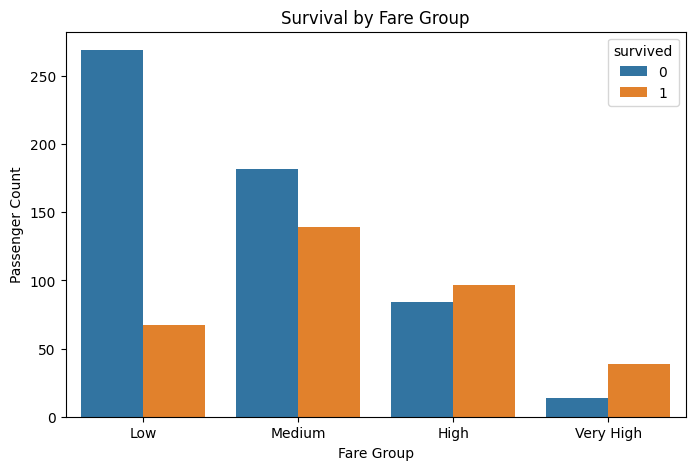

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Binning Age into categories
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['age'], bins=age_bins, labels=age_labels)

# Binning Fare into categories
fare_bins = [-np.inf, 10, 30, 100, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
titanic_df['FareGroup'] = pd.cut(titanic_df['fare'], bins=fare_bins, labels=fare_labels)

# Data visualization - Survival by AgeGroup
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='AgeGroup', hue='survived')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Count')
plt.show()

# Data visualization - Survival by FareGroup
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_df, x='FareGroup', hue='survived')
plt.title('Survival by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Passenger Count')
plt.show()



*   Use Normalization (min-max scaling) when you want to preserve the original distribution of the data and the algorithm used benefits from values being in the range [0, 1].

*   Use Standardization (z-score scaling) when the data has outliers or the algorithm used benefits from features having zero mean and unit variance.

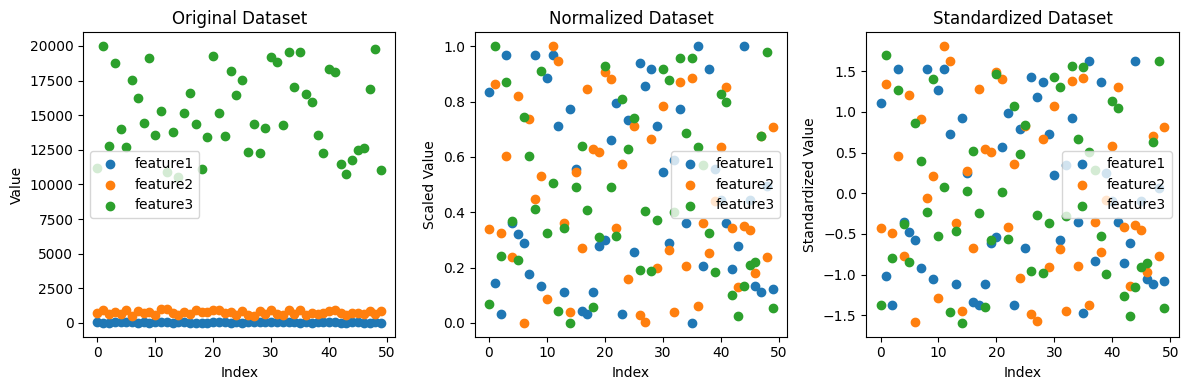

In [27]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a random dataset with three features
random.seed(42)
data = {
    'feature1': [random.randint(0, 100) for _ in range(50)],
    'feature2': [random.randint(500, 1000) for _ in range(50)],
    'feature3': [random.randint(10000, 20000) for _ in range(50)]
}

df = pd.DataFrame(data)

# Apply normalization using MinMaxScaler
scaler_norm = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_norm.fit_transform(df), columns=df.columns)

# Apply standardization using StandardScaler
scaler_std = StandardScaler()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

# Data Visualization

# Original Dataset
plt.figure(figsize=(12, 4))
plt.subplot(131)
for col in df.columns:
    plt.scatter(df.index, df[col], label=col)
plt.title('Original Dataset')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Normalized Dataset
plt.subplot(132)
for col in df_normalized.columns:
    plt.scatter(df_normalized.index, df_normalized[col], label=col)
plt.title('Normalized Dataset')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend()

# Standardized Dataset
plt.subplot(133)
for col in df_standardized.columns:
    plt.scatter(df_standardized.index, df_standardized[col], label=col)
plt.title('Standardized Dataset')
plt.xlabel('Index')
plt.ylabel('Standardized Value')
plt.legend()

plt.tight_layout()
plt.show()